# Analysis of Road Accidents in the UK

##### Project Checklist:
1. Frame the Problem and Look at the Big Picture
2. Get the Data
3. Explore the Data
4. Prepare the Data
5. Shortlist Promising Models
6. Fine-Tune the System
7. Present Your Solution
8. Launch!

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
plt.style.use("classic")

## Accident Dataset

Exploratory Analysis of cleaned and prepared Accidents Dataset

Preliminary Research questions:
1.	In which areas do the most accidents, and the most severe accidents occur?
2.	What effect does weather conditions have on the volume and severity of accidents?
3.	On which days and at what times do the most, and the most severe, accidents occur?
4.	Which type of road user is involved with the most accidents, and the most severe accidents?
5.	Which type of vehicles are involved in the most road accidents, and the most severe accidents?
6.	During which type of journey do the most and the most severe accidents occur?
7.	How has the frequency and severity of accidents developed over time?
8.	What are the key attributes which contribute to the frequency and severity of accidents?


In [3]:
# read accident data
acc_df = pd.read_csv("./data/working_sets/final_acc_adj.csv", low_memory=False, index_col=False)

#### PICKLE DATA FOR SAVING AND LOADING

In [4]:
# # pickle data to save (dump)
# with open("./data/working_sets/accident_data.pkl", "wb") as f: # wb = write binary
#     pickle.dump(acc_df, f)

In [5]:
# load pickled data
with open("./data/working_sets/accident_data.pkl", "rb") as f:
    acc = pickle.load(f)

### Create TRAIN / TEST Split

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(acc, test_size = 0.2, random_state = 1)

In [7]:
# check split
print(len(train_set), len(test_set))

1742704 435677


In [8]:
# check for nulls and missing (should have been removed in preprocessing)
acc.isna().sum()

accident_index             0
longitude                  0
latitude                   0
police_force               0
accident_severity          0
num_veh                    0
num_cas                    0
date                       0
day                        0
time                       0
district                   0
highway                    0
road_type                  0
speed_limit                0
light_conditions           0
weather_conditions         0
road_surface_conditions    0
special_conditions         0
urban_rural                0
police_attended            0
adjusted_severity          0
dtype: int64

In [9]:
# check severity details
acc.accident_severity.describe(),acc.adjusted_severity.describe()

(count    2.178381e+06
 mean     2.829111e+00
 std      4.094559e-01
 min      1.000000e+00
 25%      3.000000e+00
 50%      3.000000e+00
 75%      3.000000e+00
 max      3.000000e+00
 Name: accident_severity, dtype: float64,
 count    2.178381e+06
 mean     6.636675e-01
 std      4.153823e-01
 min      0.000000e+00
 25%      0.000000e+00
 50%      8.967312e-01
 75%      9.687430e-01
 max      1.000000e+00
 Name: adjusted_severity, dtype: float64)

<AxesSubplot:>

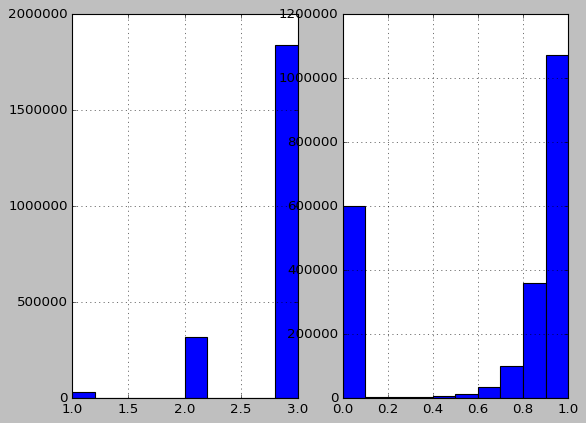

In [13]:
# checking severity and adjusted severity
fig, axes = plt.subplots(1,2)
acc.accident_severity.hist(ax=axes[0])
acc.adjusted_severity.hist(ax=axes[1])

## Exploratory

In [8]:
# # creating a smallset to review preparation requirements
# expl = train_set.sample(n = 100000, random_state = 1)
# expl.dtypes

accident_index              object
longitude                  float64
latitude                   float64
police_force                 int64
accident_severity            int64
num_veh                      int64
num_cas                      int64
date                        object
day                          int64
time                        object
district                     int64
highway                     object
road_type                    int64
speed_limit                float64
light_conditions             int64
weather_conditions           int64
road_surface_conditions      int64
special_conditions           int64
urban_rural                  int64
police_attended              int64
adjusted_severity          float64
dtype: object

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'police_force'}>,
        <AxesSubplot:title={'center':'accident_severity'}>],
       [<AxesSubplot:title={'center':'num_veh'}>,
        <AxesSubplot:title={'center':'num_cas'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'district'}>],
       [<AxesSubplot:title={'center':'road_type'}>,
        <AxesSubplot:title={'center':'speed_limit'}>,
        <AxesSubplot:title={'center':'light_conditions'}>,
        <AxesSubplot:title={'center':'weather_conditions'}>],
       [<AxesSubplot:title={'center':'road_surface_conditions'}>,
        <AxesSubplot:title={'center':'special_conditions'}>,
        <AxesSubplot:title={'center':'urban_rural'}>,
        <AxesSubplot:title={'center':'police_attended'}>],
       [<AxesSubplot:title={'center':'adjusted_severity'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]]

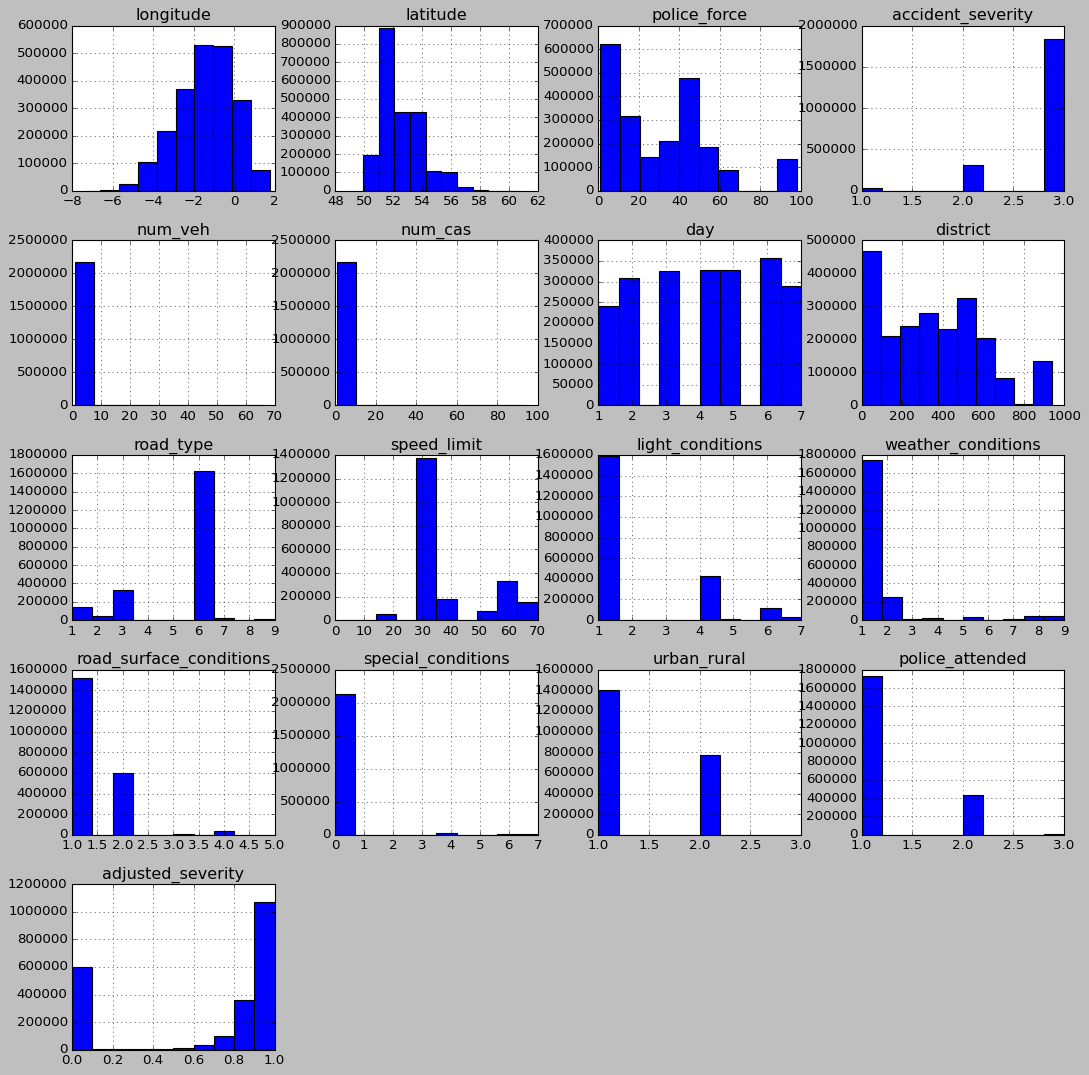

In [22]:
acc.hist(figsize=(16,16))

<AxesSubplot:>

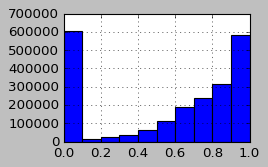

In [39]:
# look at adjusted severity bins
prep = acc.copy()
prep["temp_sev"] = prep["adjusted_severity"]**3
prep.temp_sev.hist(figsize = (3,2))

In [30]:
prep.tem_sev.describe()

count    100000.000000
mean          0.570038
std           0.387048
min           0.000000
25%           0.000000
50%           0.720875
75%           0.908713
max           1.000000
Name: temp_sev, dtype: float64

<AxesSubplot:>

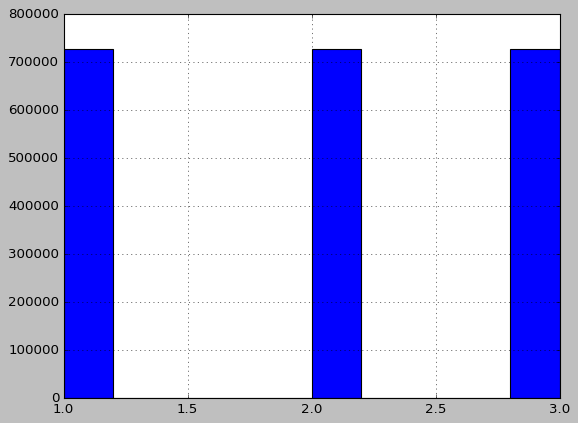

In [42]:
quantiles = [prep["temp_sev"].quantile(0.3334), prep["temp_sev"].quantile(0.6667), prep["temp_sev"].quantile(1)]

conditions = [
    (prep["temp_sev"] <= quantiles[0]),
    (prep["temp_sev"] > quantiles[0]) & (prep["temp_sev"] <= quantiles[1]) ,
    (prep["temp_sev"] > quantiles[1])
]

values = [1,2,3]

prep["proxy_severity"] = np.select(conditions, values)
prep.proxy_severity.hist()

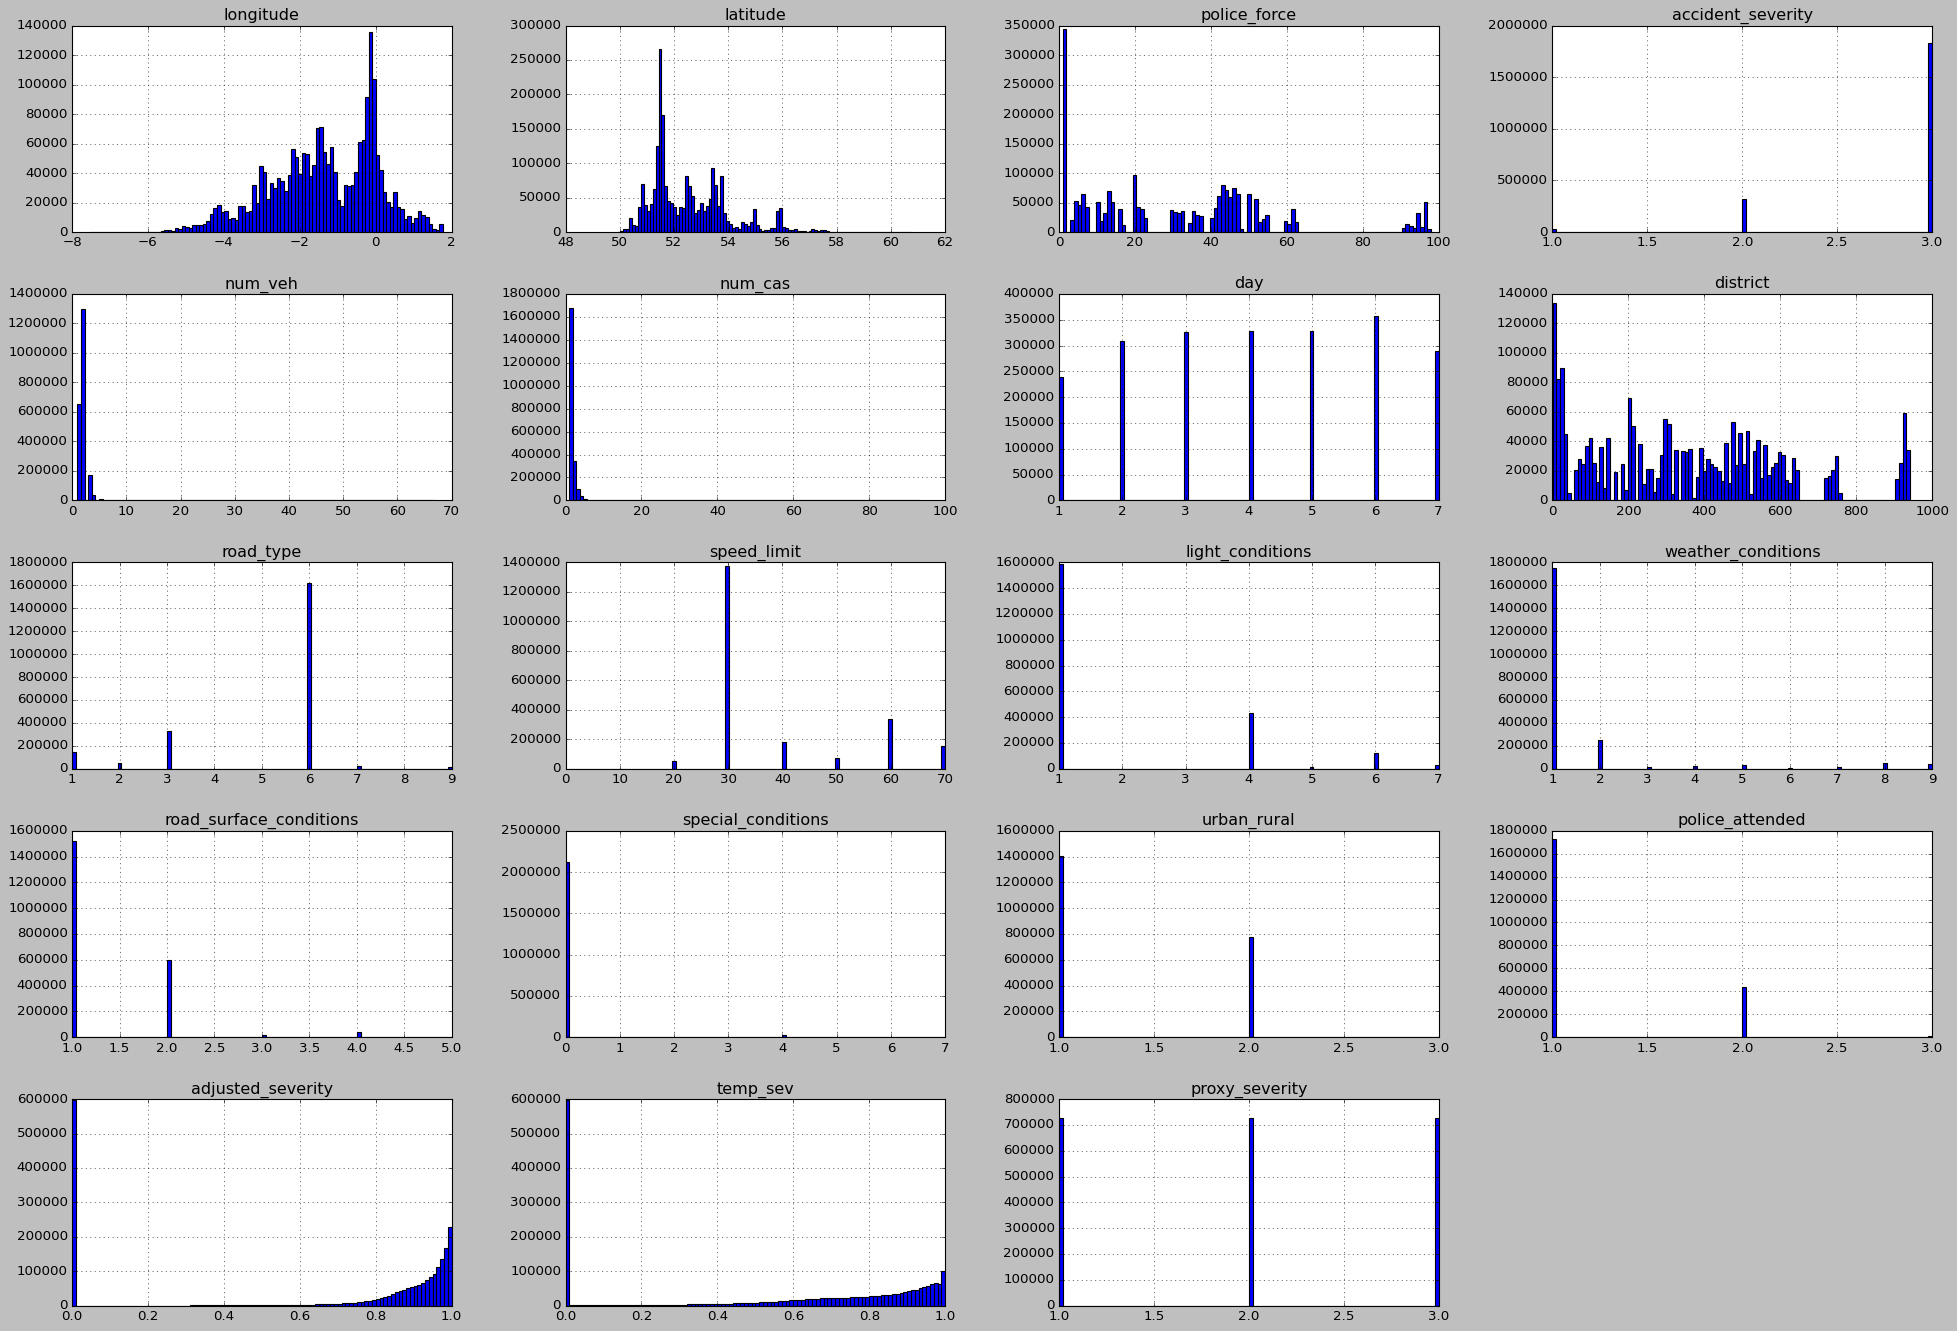

In [44]:
# plot numerical values in histograms
prep.hist(bins=100,figsize=(30,20))
plt.savefig("./plots/prep_hist1.png")
plt.show()

## Research Questions

### 1.  In which areas do the most accidents, and the most severe accidents occur?

Firstly, I will plot the accidents using longitude and latitude coordinates

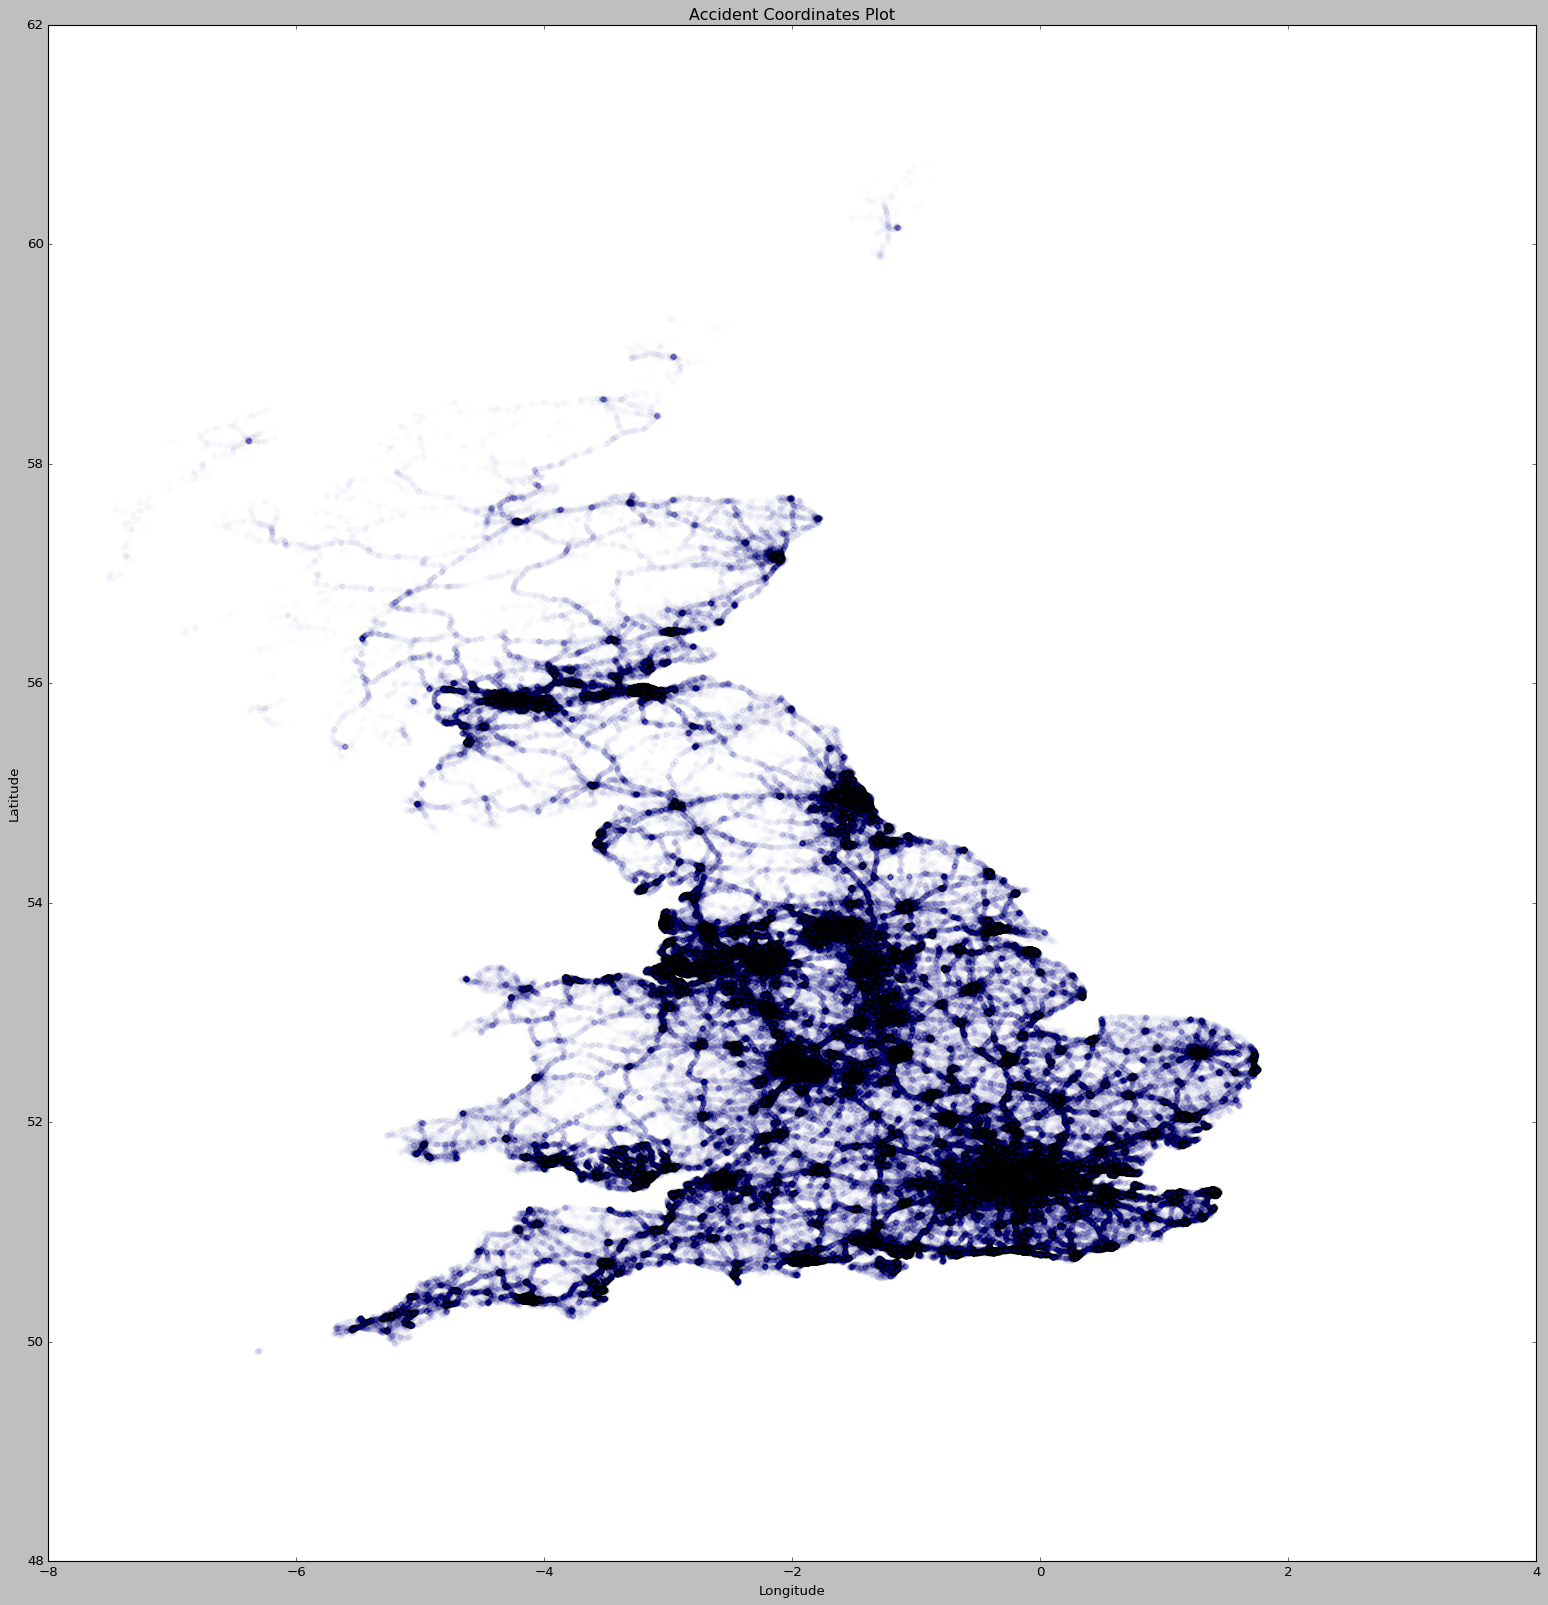

In [5]:
acc.plot(kind="scatter", x="longitude", y = "latitude", alpha=0.006, figsize=(24,24), 
        )
plt.title("Accident Coordinates Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.savefig("./plots/acc_scattermap1.png")
plt.show()

As would be expected we can see thhe number of instances increases in the more populated cities.

It is difficult to get a good view of the severity due to the number of instances, I will try reducing the granularity by creating longitude and latitude bins

In [ ]:
# look at long lat distribution
acc["longitude"].hist(bins=5, figsize=(4,4))

In [ ]:
acc["latitude"].hist(bins=5, figsize=(4,4))

In [1]:
# create rounded longlats
acc_long_lats = acc.copy()
acc_long_lats["adj_long"] = acc["longitude"].round(1)
acc_long_lats["adj_lat"] = acc["latitude"].round(1)

# summarise count by long-lat region
acc_long_lats["accident_count"] = acc_long_lats["accident_index"].groupby([acc_long_lats["adj_long"],acc_long_lats["adj_lat"]] ).transform("count")

# group adjusted longlat records with count
grouped_longlats = acc_long_lats.groupby(["adj_long", "adj_lat", "accident_count"]).agg({"accident_severity" : "mean"})
grouped_longlats.columns = ["average_severity"]
grouped_longlats = grouped_longlats.reset_index()

print(grouped_longlats.sort_values(by="accident_count", ascending=False).head(60))

NameError: name 'acc' is not defined

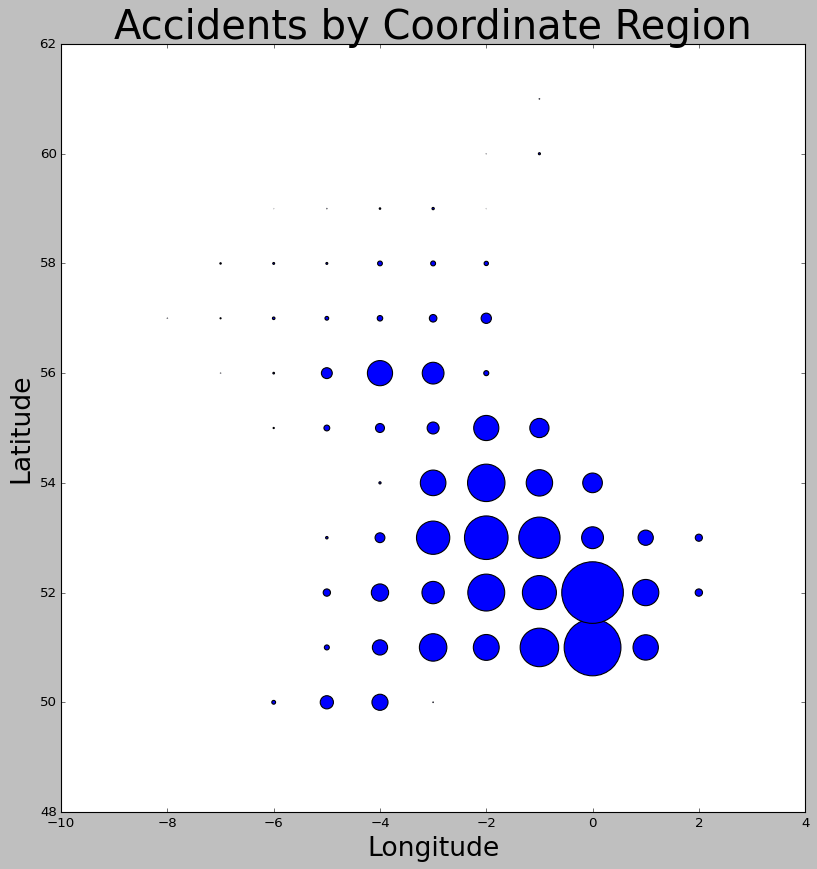

In [8]:
# plot adjusted longlots
grouped_longlats.plot(kind="scatter", x="adj_long", y = "adj_lat", figsize=(12,12),
                   s=(grouped_longlats["accident_count"]*0.01),
#                    c=grouped_longlats["average_severity"], cmap=plt.get_cmap("jet"), colorbar=False
        )
plt.title("Accidents by Coordinate Region", fontsize=36)
plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)
# plt.savefig("./plots/acc_scattermap2_adjgeos.png")
plt.show()

 I would like to come back here and consider ways of getting more accurate data based on geocoordinates.
 
 consider bringing in population etc??

### 2. What effect does weather conditions have on the volume and severity of accidents?

In [ ]:
acc.weather_conditions.hist(bins=100, figsize = )

## Attribute Analysis

Each attribute to be analysed in preparation for fitting machine learning models.

In [4]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178381 entries, 0 to 2178380
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   accident_index           object 
 1   longitude                float64
 2   latitude                 float64
 3   police_force             int64  
 4   accident_severity        int64  
 5   num_veh                  int64  
 6   num_cas                  int64  
 7   date                     object 
 8   day                      int64  
 9   time                     object 
 10  district                 int64  
 11  highway                  object 
 12  road_type                int64  
 13  speed_limit              int64  
 14  light_conditions         int64  
 15  weather_conditions       int64  
 16  road_surface_conditions  int64  
 17  special_conditions       int64  
 18  urban_rural              int64  
 19  police_attended          int64  
 20  adjusted_severity_bin    float64
dtypes: float

### Feature Engineering Notes

__TODO__:
- allcategorical attributes need to have their type changed to category
- find the video on grouping low count values to "other"
- look into transformation pipeline for preparation
- look at readjusting severity bins (AFTER OTHERS ARE SORTED)

__accident_index__
- drop this for ML model

__longitude and latitude__
- create bins for these
- consider getting ENGLAND areas at a later date (or maybe using PQ for quick fix)

__police_force__
- subdivide into less bins
- 0 and others maybe?

__accident_severity__
- retain as-is?

__num_veh__ and __num_cas__
- divide into smaller bins as quite skewed?

__day__
- does this need to be category type

__time__
- create bins?
- get hour only and then look at AM / PM

__road_type__
- create two bins

__speed_limit__
- maybe just two bins here as most are 30 mph

__light_conditions, weather_conditions, and __
- create two bins (OK and BAD)

__road_surface_conditions__
- drop as no value

__urban_rural and police attended__
- two categories

__adjusted_bin_severity__
- form two bins out of these


### 1. longitude and latitude
We will attempt to create custom regions which can be used as categories, by adjusting the number of significant digits in the coordinates.

In [ ]:
# get first view 
print(acc.longitude.head(), acc.latitude.head())

In [ ]:
# create copy of dataframe for long-lat engineering
df = acc.copy()
df.longitude = df.longitude
df.latitude = df.latitude
df["long_lat_region"] = df.longitude.round(0).astype(str) + "_" + \
df.latitude.round(0).astype(str)

print(df.long_lat_region.nunique())

In [ ]:
df.head()

In [ ]:
# try heatmap
import chart_studio.plotly as py
import plotly.graph_objs as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
# # creating scatter plot
# data = go.Scattergeo(
#     lon = df["longitude"],
#     lat = df["latitude"],
#     mode="markers",
#     marker = dict(size=2, colorscale = "Blues"),
#     marker_color = df["accident_count"],)

# layout = dict(title = "Accident Locations on UK Map", geo_scope="europe")

# choromap = go.Figure(data = [data], layout = layout)
# iplot(choromap)

# FUCKIN PIECE OF SHIT WONT FUCKING DISPLAY